# Basic classification using the PEP model

This notebook explains how to perform GP inference using the Markovflow ExpectationPropagation model.
Here, we perform binary classification with time as the input.

As with GPR, the observations do not have to be regularly spaced. However, they do need to be sequential. We denote the input/output tuples as $(x_i, y_i)_{1 \leq i \leq n}$, where $x_i$ is a scalar value and $y_i \in \{0, 1\}$.

Our probabilistic model for this data is:
$$
\begin{align}
f \sim \mathcal{GP}(0, k(., .)) \\
y_i \sim \mathcal{B}(\Phi(f(x_i)))
\end{align}
$$

where $\Phi$ is a function that maps $f(x_i)$ to $[0, 1]$, the probability that $y_i=1$. In practice, we choose $\Phi$ to be the standard normal cumulative distribution function (also known as the probit function) which maps to $[0, 1]$.

**NOTE:** If you have difficulty running this notebook, consider clearing the output and then restarting the kernel.

In [1]:
# Setup

import warnings

# Turn off warnings
warnings.simplefilter('ignore')


import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from gpflow import default_float
from gpflow.ci_utils import ci_niter
from gpflow.likelihoods import Bernoulli

from markovflow.likelihoods import PEPScalarLikelihood
from markovflow.models.pep import PowerExpectationPropagation
from markovflow.kernels import Matern52


np.random.seed(0)
FLOAT_TYPE = default_float()

# uncomment in notebook
# try:
#     from IPython import get_ipython
#     get_ipython().run_line_magic('matplotlib', 'inline')
# except AttributeError:
#     print('Magic function can only be used in IPython environment')
#     matplotlib.use('Agg')

plt.rcParams["figure.figsize"] = [15, 8]

2022-09-17 14:47:11.494493: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/hostedtoolcache/Python/3.7.13/x64/lib
2022-09-17 14:47:11.494531: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Step 1: Generate training data

First, let's generate some binary data $X = (x_1, \dots, x_n)$ and $Y = (y_1, \dots, y_n)^T$.

In [2]:
# Generate some observations
num_data = 300
time_points = np.linspace(0 , 1, num_data)
F = np.cos(time_points * 20).reshape(-1, 1)
observations = (F + np.random.randn(*F.shape) > 0).astype(float)
data = (time_points, observations)

## Step 2: Choose a kernel

In [3]:

kernel = Matern52(lengthscale=.2, variance=5.0)

# We see Matern12 has only two dimensions (therefore there is less risk of overparameterising)
print(kernel.state_dim)

3


2022-09-17 14:47:12.972709: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-09-17 14:47:12.972902: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/hostedtoolcache/Python/3.7.13/x64/lib
2022-09-17 14:47:12.972912: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-17 14:47:12.972933: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fv-az178-774): /proc/driver/nvidia/version does not exist
2022-09-17 14:47:12.973188: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F F

## Step 3: Build and optimise a model

This is a classification problem with outputs between `[0,1]`, so we create a variational GP model using a Bernoulli likelihood.

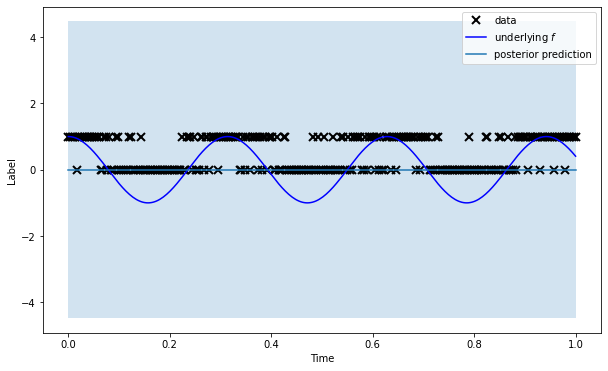

0 -231.0491597937332


0 -214.77699898479378


2022-09-17 14:47:13.727396: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


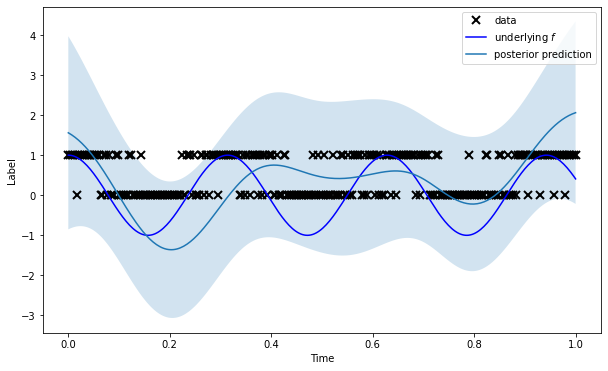

1 -213.06358395606682


1 -190.27824759518748


2 -188.92906484630973


2 -180.335015816715


3 -179.57234411188713


3 -180.1208778253554


4 -179.45214445172243


4 -177.87180552822403


5 -177.40391031206644


5 -177.21720954347902


6 -176.85867603587604


6 -176.0282990253869


7 -175.74293689770914


7 -175.1624961531809


8 -174.89717721712216


8 -175.2343661444951


9 -175.0139852407632


9 -175.3279790498278


10 -175.14463038869218


10 -174.905929888208


11 -174.74477459624424


11 -174.55058399439903


12 -174.40456648257592


12 -173.8366381388176


13 -173.69852780857406


13 -173.74780350008473


14 -173.62597086270017


14 -173.64331589383085


15 -173.53379050172273


15 -173.4373641936384


16 -173.33785763602552


16 -173.30454507588396


17 -173.2145202889


17 -172.5293940373353


18 -172.44303826843876


18 -171.9813185078857


19 -171.90022785240748


19 -171.91678392271353


20 -171.84343095571714


20 -171.79575784238762


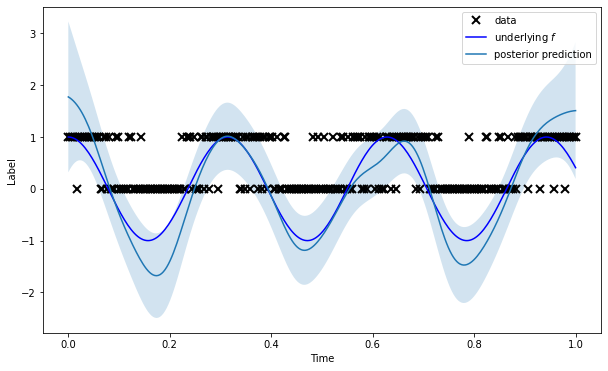

21 -171.7284108182593


21 -171.7729630829281


22 -171.7116455336503


22 -171.79565647652646


23 -171.74028920058973


23 -171.72633995092286


24 -171.6758746422015


24 -171.66875265213125


25 -171.6228985544019


25 -171.64219061485315


26 -171.60045407132293


26 -171.59767594769502


27 -171.5596377378098


27 -171.4575572860414


28 -171.42285494081608


28 -171.3478539428853


29 -171.31620702794032


29 -171.30249820442782


30 -171.2737853166842


30 -171.30054600828703


31 -171.27452889506196


31 -171.28680206120782


32 -171.26324340458368


32 -171.24968748058538


33 -171.22832729010423


33 -171.23141977997125


34 -171.21207244111034


34 -171.21370000931063


35 -171.19618585420952


35 -171.20789381897387


36 -171.19206609264825


36 -171.19382138568528


37 -171.17951386294385


37 -171.1834733764883


38 -171.17057561471722


38 -171.17972218133423


39 -171.16811537698783


39 -171.17132271676365


40 -171.16090000747977


40 -171.1607006467595


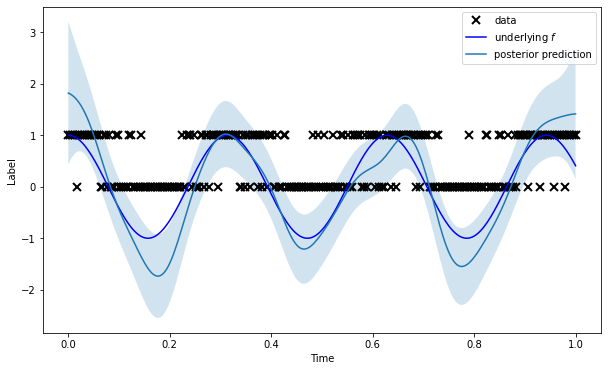

41 -171.15136866889802


41 -171.14636512960914


42 -171.13803233145407


42 -171.13645374738996


43 -171.12904538581256


43 -170.99477590256888


44 -170.98814038653606


44 -170.9886893700401


45 -170.9828639142247


45 -170.9952657205701


46 -170.9902026241607


46 -170.99626131967608


47 -170.9919020661602


47 -170.99433890984474


48 -170.990622601943


48 -170.90018592883638


49 -170.89705395837137


49 -170.87733305357747


50 -170.87477592743818


50 -170.8931293634422


51 -170.89114942372942


51 -170.894916894525


52 -170.8934692673227


52 -170.90294645297814


53 -170.90201126046856


53 -170.90171029479401


54 -170.9012520137266


54 -170.8900747736677


55 -170.89006834436825


55 -170.89462661427834


56 -170.8950321963465


56 -170.90224444487245


57 -170.90303789508678


57 -170.90545090716964


58 -170.90660258073598


58 -170.90967878287


59 -170.91116934222515


59 -170.91239816440884


60 -170.91419315572506


60 -170.9096874213032


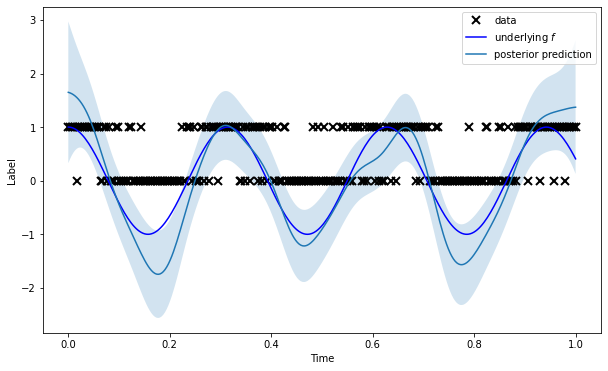

61 -170.911765699373


61 -170.91901090175236


62 -170.9213567154394


62 -170.90490862284665


63 -170.907515787416


63 -170.9148029842218


64 -170.91765935296576


64 -170.9190137968119


65 -170.92209734128582


65 -170.9259829420597


66 -170.92928510556652


66 -170.93149367450258


67 -170.93499116461481


67 -170.93489118676507


68 -170.93857408955023


68 -170.94099915883714


69 -170.9448509537769


69 -170.94470557696562


70 -170.9487116336893


70 -170.95029823146695


71 -170.95444648501558


71 -170.95593232698636


72 -170.96021477430253


72 -170.95961068531665


73 -170.96401382501472


73 -170.9553352994066


74 -170.9598564456548


74 -170.9615974949536


75 -170.96622889944513


75 -170.9675816227238


76 -170.97231141145335


76 -170.9736190390027


77 -170.9784365380065


77 -170.98168358852746


78 -170.9865881411833


78 -170.9883228786294


79 -170.99330564076885


79 -170.99643003364912


80 -171.0014891837185


80 -171.0023630223304


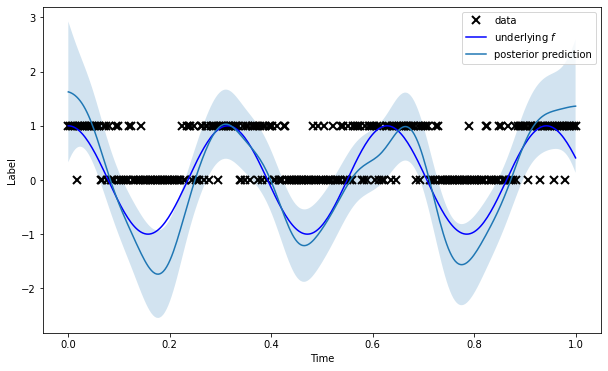

81 -171.00749012022015


81 -171.0099004655956


82 -171.01509158770065


82 -171.0150201327241


83 -171.02027207956377


83 -171.02201078017916


84 -171.0273116516171


84 -171.03034494723858


85 -171.03569508226627


85 -171.03752111273124


86 -171.04291916625294


86 -171.04354030328503


87 -171.04897841659812


87 -171.0507766119764


88 -171.0562529293623


88 -171.05718923299227


89 -171.06270234012632


89 -171.05911261708104


90 -171.06466175539603


90 -171.06637871633936


91 -171.07195837671583


91 -171.07301818049427


92 -171.0786291024627


92 -171.0804599427981


93 -171.08609746644785


93 -171.08729709968847


94 -171.0929603562472


94 -171.0940015979524


95 -171.09968517199871


95 -171.10064519745862


96 -171.10634384512372


96 -171.10770328153112


97 -171.11341924727654


97 -171.11199443547557


98 -171.11772552084147


98 -171.1193023923418


99 -171.12504637286312


99 -171.1261097547178


100 -171.13185877223924


100 -171.13359614275055


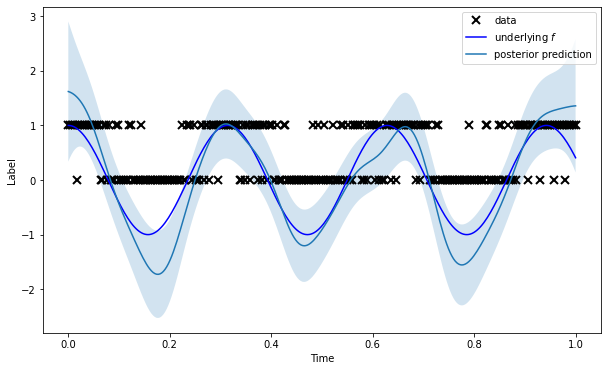

101 -171.13935462035883


101 -171.14081723786174


102 -171.1465804336036


102 -171.14767809828663


103 -171.15344022393572


103 -171.15419663424154


104 -171.15995303166792


104 -171.16103886952223


105 -171.16679058788264


105 -171.16631282439883


106 -171.1720560159942


106 -171.17340630180414


107 -171.1791410160664


107 -171.18017182158792


108 -171.1858945446079


108 -171.18698298714563


109 -171.19269005267492


109 -171.19370246543997


110 -171.1993934513199


110 -171.20105277317677


111 -171.2067185059281


111 -171.20804039890317


112 -171.21369148745947


112 -171.2148637747766


113 -171.22048738303738


113 -171.22081401014174


114 -171.2264113696462


114 -171.2272335611746


115 -171.2328119679297


115 -171.2340911704521


116 -171.2396385934215


116 -171.24056709736513


117 -171.24608797298941


117 -171.24723277343577


118 -171.25272267965906


118 -171.25343128102082


119 -171.258884251837


119 -171.25949008670574


120 -171.26491059612675


120 -171.2659135657769


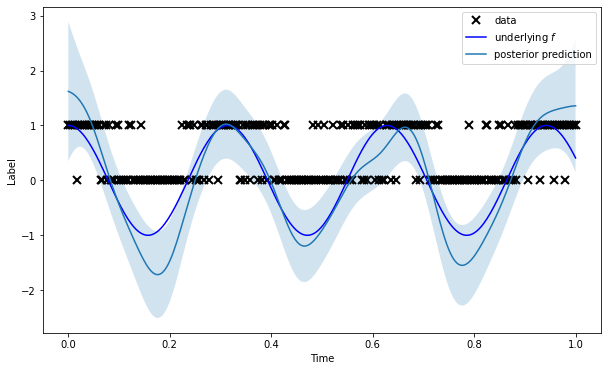

121 -171.27129677219114


121 -171.27212973819724


122 -171.27747006221102


122 -171.27844541174656


123 -171.28374856612874


123 -171.28453369595275


124 -171.2897897497744


124 -171.290286863312


125 -171.29549796621336


125 -171.29626584762022


126 -171.30143161211518


126 -171.30248510865113


127 -171.30760171626608


127 -171.3086213518722


128 -171.3136872719416


128 -171.31468594724427


129 -171.31970186578573


129 -171.3204715350928


130 -171.32543809955288


130 -171.32647854377055


131 -171.33139327251706


131 -171.332239336912


132 -171.33710139374892


132 -171.33783614715574


133 -171.34264258653764


133 -171.34352521273757


134 -171.34827646889403


134 -171.34919083487165


135 -171.3538919518648


135 -171.35501084098058


136 -171.3596486893701


136 -171.36031431650116


137 -171.36489804647573


137 -171.36577767128452


138 -171.3703030822246


138 -171.37089295096644


139 -171.37535945459993


139 -171.3759578798314


140 -171.38036571520686


140 -171.38111076621303


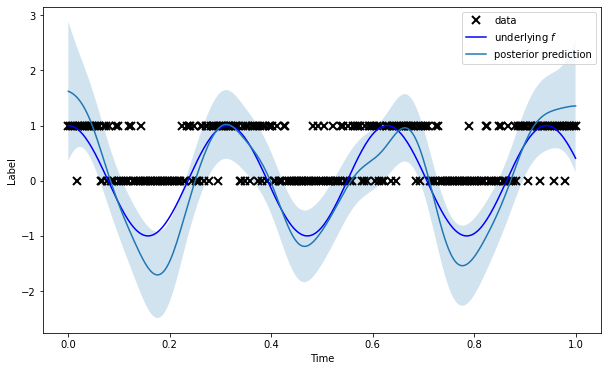

141 -171.3854573775265


141 -171.3862149967676


142 -171.3904995822685


142 -171.39170178504713


143 -171.3959256425758


143 -171.39658326593408


144 -171.40074416832044


144 -171.40150822972834


145 -171.40560341626963


145 -171.40654933893333


146 -171.41058383611883


146 -171.41130021790696


147 -171.41527294875954


147 -171.41579728709823


148 -171.41970092502996


148 -171.42060383264794


149 -171.42444414578102


149 -171.4252379270157


150 -171.42901431275465


150 -171.42977230945974


151 -171.4334797994658


151 -171.43417708817805


152 -171.43782176340778


152 -171.43846644186664


153 -171.44204035882154


153 -171.44290558763794


154 -171.4464204105751


154 -171.44703875897534


155 -171.45048394239146


155 -171.45096498497838


156 -171.45434613120642


156 -171.45493635684653


157 -171.45825321568995


157 -171.4587457624902


158 -171.46200104933595


158 -171.46249671903774


159 -171.46568294024348


159 -171.4661691370086


160 -171.46929377317883


160 -171.46990916298085


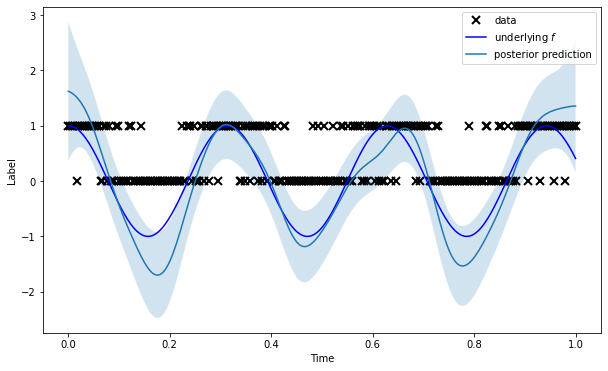

161 -171.4729654562692


161 -171.47358230365887


162 -171.47657745072982


162 -171.477345974809


163 -171.48028092588876


163 -171.4806259746503


164 -171.48349583824893


164 -171.4840549745399


165 -171.48685977610984


165 -171.48745368844266


166 -171.49019780289314


166 -171.4905704741509


167 -171.49325875834194


167 -171.4937380851698


168 -171.4963625199838


168 -171.4968950198495


169 -171.49945588122932


169 -171.49985233011742


170 -171.50235650525198


170 -171.50283242885808


171 -171.5052794429566


171 -171.50571017144264


172 -171.50809240277133


172 -171.50854157497525


173 -171.51086901471916


173 -171.51138448631932


174 -171.51365853064573


174 -171.5141456118003


175 -171.51635544744158


175 -171.51667327709953


176 -171.5188274738174


176 -171.51919885909663


177 -171.52130113458713


177 -171.5217158674348


178 -171.5237590221125


178 -171.52412748971864


179 -171.52612071045473


179 -171.52655107168272


180 -171.52849010629046


180 -171.52883330318463


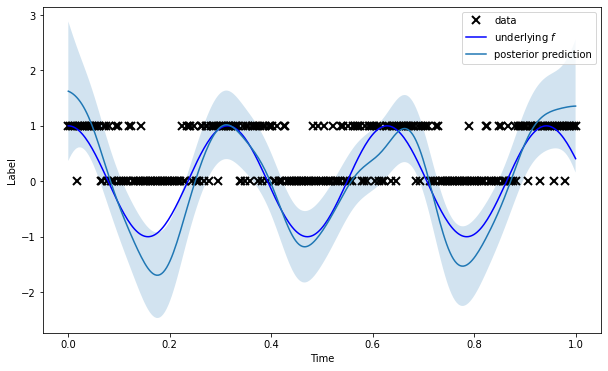

181 -171.5307187087387


181 -171.53110774230393


182 -171.53294130249193


182 -171.53324070891037


183 -171.53503039746806


183 -171.53540555325057


184 -171.5371399383666


184 -171.5375213453128


185 -171.53921041685115


185 -171.53957504139598


186 -171.54121595530432


186 -171.54140835196048


187 -171.54300089036798


187 -171.5433743994917


188 -171.54492509644572


188 -171.54532015552851


189 -171.546822070627


189 -171.5471414734753


190 -171.54860201862334


190 -171.54886978389806


191 -171.55029123783942


191 -171.55052601670332


192 -171.55190422492754


192 -171.55224588627374


193 -171.5535805368549


193 -171.55385270241322


194 -171.55514921291382


194 -171.55542200558662


195 -171.55667803272712


195 -171.55692528056935


196 -171.55814748025603


196 -171.5583730075669


197 -171.5595541451081


197 -171.55973031314323


198 -171.5608774305265


198 -171.56107358758655


199 -171.56218373275377


199 -171.562345144562


200 -171.56342051813115


200 -171.56360865113908


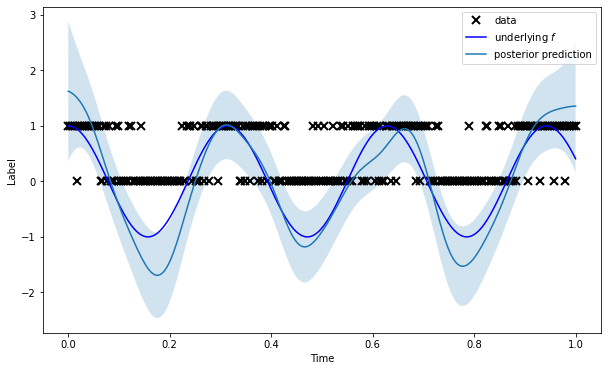

201 -171.56465232636077


201 -171.5648674897166


202 -171.56587690772878


202 -171.56606160415436


203 -171.56703889046065


203 -171.5672811320363


204 -171.5682256355052


204 -171.56842238524092


205 -171.5693412230766


205 -171.56951661468386


206 -171.57040066180298


206 -171.57061910445623


207 -171.57147722788818


207 -171.57162238817835


208 -171.57245411824306


208 -171.5726177829537


209 -171.5734179058614


209 -171.57357345629305


210 -171.57435019823103


210 -171.57446481136222


211 -171.57521719461297


211 -171.57540744911768


212 -171.57613287741975


212 -171.5762573056084


213 -171.57695874172276


213 -171.57714148990854


214 -171.57782242806348


214 -171.57795779102082


215 -171.57861414630526


215 -171.5787547392594


216 -171.5793893643291


216 -171.57948116886084


217 -171.5800929778027


217 -171.5802303402183


218 -171.58082426140538


218 -171.5809186400556


219 -171.58149050902855


219 -171.58164852849197


220 -171.58220461904452


220 -171.58230959997775


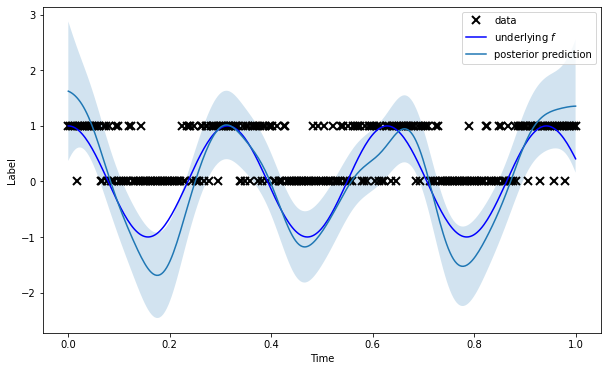

221 -171.58284623636763


221 -171.5829229753026


222 -171.5834396784731


222 -171.5835330960944


223 -171.5840367079825


223 -171.58413063964224


224 -171.58461335746853


224 -171.58473509742282


225 -171.58520057072798


225 -171.5852949818031


226 -171.58574722104748


226 -171.58583726317997


227 -171.5862763840323


227 -171.5863482790597


228 -171.58677101666115


228 -171.5868431889098


229 -171.5872504795347


229 -171.58729955301817


230 -171.58769656343583


230 -171.58777470199638


231 -171.58815611305252


231 -171.58821544544264


232 -171.58858611069962


232 -171.58865565637635


233 -171.58901516430436


233 -171.58908340352


234 -171.58943116884217


234 -171.5894893693048


235 -171.58982425718307


235 -171.58986386808152


236 -171.5901914453245


236 -171.5902233739744


237 -171.59053944440268


237 -171.5905727237359


238 -171.59087744365783


238 -171.5909110810559


239 -171.59120498340744


239 -171.5912378781924


240 -171.59152811659277


240 -171.5915634509568


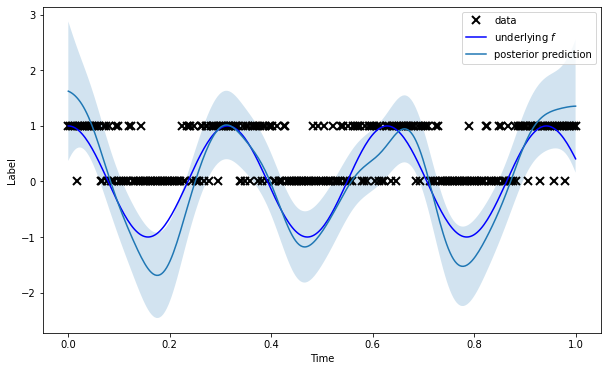

241 -171.59184037073612


241 -171.5918896487251


242 -171.59216298173544


242 -171.59220427585518


243 -171.59246466529856


243 -171.59248726205686


244 -171.59274411349668


244 -171.59279328182842


245 -171.59304160482174


245 -171.59306596974668


246 -171.59330383825588


246 -171.59334319159743


247 -171.59357859537653


247 -171.593594729384


248 -171.59382397778597


248 -171.5938473403574


249 -171.5940691565161


249 -171.59408547110837


250 -171.59430242332218


250 -171.59432105553708


251 -171.59453107574114


251 -171.59455518322983


252 -171.59476134406876


252 -171.59477509796235


253 -171.59497737075787


253 -171.59499319302955


254 -171.59518934642819


254 -171.5951997137805


255 -171.5953927096068


255 -171.5953989399009


256 -171.59558671566043


256 -171.59559726089506


257 -171.59578160285457


257 -171.59579341213953


258 -171.59597395015768


258 -171.59597213048312


259 -171.59614944198285


259 -171.59615822996335


260 -171.59632919436558


260 -171.59633751148777


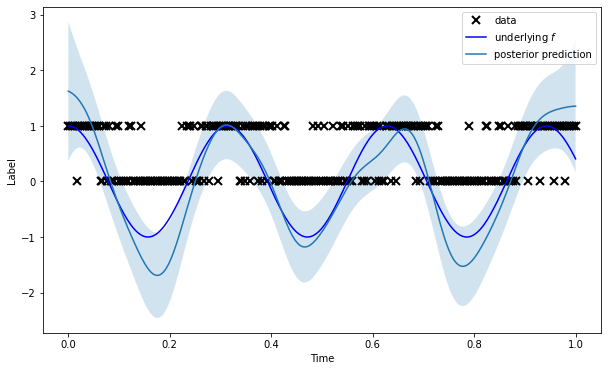

261 -171.5965075857339


261 -171.59651566827435


262 -171.5966826302623


262 -171.59668696271865


263 -171.5968523587592


263 -171.5968483785881


264 -171.59700708831255


264 -171.5970089577637


265 -171.59716842698003


265 -171.5971524551197


266 -171.59730960486579


266 -171.59730924657558


267 -171.5974615107385


267 -171.5974588237883


268 -171.5976096952606


268 -171.59760566055533


269 -171.5977545944705


269 -171.5977520719489


270 -171.59789989053556


270 -171.59789823911862


271 -171.5980430691379


271 -171.59803520571663


272 -171.59818076724204


272 -171.59816877821814


273 -171.59830902451583


273 -171.59830283707063


274 -171.59844388243428


274 -171.59843062636594


275 -171.59856807457402


275 -171.59855117225044


276 -171.59869066320644


276 -171.59868307654313


277 -171.59881828409755


277 -171.5988080526078


278 -171.59894472192474


278 -171.59893243746006


279 -171.59906667014744


279 -171.59905697136617


280 -171.59918798965612


280 -171.59917857306215


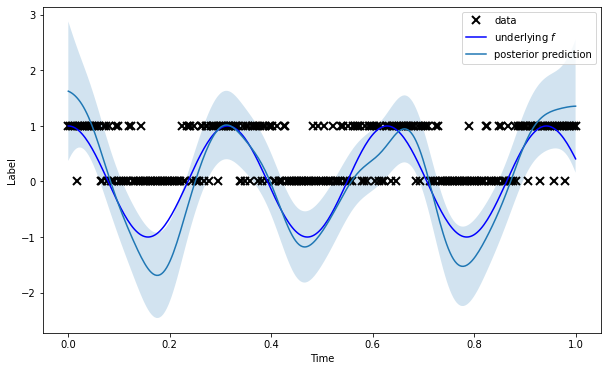

281 -171.5993112652116


281 -171.5993005623016


282 -171.59943002153045


282 -171.59941231234777


283 -171.59954401315196


283 -171.59952541950088


284 -171.59965451678164


284 -171.59964429376436


285 -171.59977475884588


285 -171.59976132709818


286 -171.5998891039631


286 -171.59987856811424


287 -171.60000558795866


287 -171.5999969600691


288 -171.60012341596956


288 -171.6000990314376


289 -171.60022533200447


289 -171.60020595248


290 -171.600332826775


290 -171.6003205908276


291 -171.60044611165262


291 -171.6004318175059


292 -171.60055690843615


292 -171.60054351895252


293 -171.60066913153096


293 -171.60065329023573


294 -171.60077733940057


294 -171.60076371173696


295 -171.60089383980824


295 -171.6008739720247


296 -171.6009945546171


296 -171.600979281643


297 -171.60110581064293


297 -171.60106853350666


298 -171.6011962374604


298 -171.60118054781876


299 -171.60130475848962


299 -171.60128881238094


300 -171.60141406013977


300 -171.60139651143913


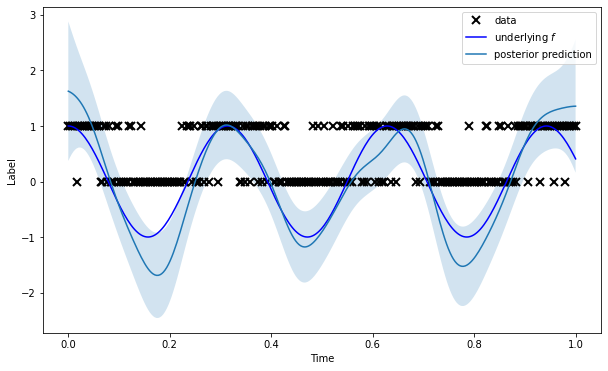

301 -171.6015230869897


301 -171.60150217269916


302 -171.60162776568066


302 -171.60160539728355


303 -171.60173031676874


303 -171.60170755820707


304 -171.60183444218495


304 -171.60180413285386


305 -171.60192815914496


305 -171.60190640533466


306 -171.60203002540388


306 -171.60201138688518


307 -171.60213790301486


307 -171.60211904169012


308 -171.60224512011087


308 -171.60222325959836


309 -171.6023460008626


309 -171.602325939001


310 -171.60245227881614


310 -171.60243016529392


311 -171.6025531232993


311 -171.60252971411708


312 -171.60265467032045


312 -171.60264198184785


313 -171.6027680391393


313 -171.60274698684594


314 -171.60287224951458


314 -171.60285366223314


315 -171.60297766775943


315 -171.60296079254397


316 -171.60308484837304


316 -171.60306616590418


317 -171.6031931837024


317 -171.60316743955016


318 -171.60329093563615


318 -171.6032655062951


319 -171.60339128070456


319 -171.60336804983083


320 -171.60349383727203


320 -171.60347153568574


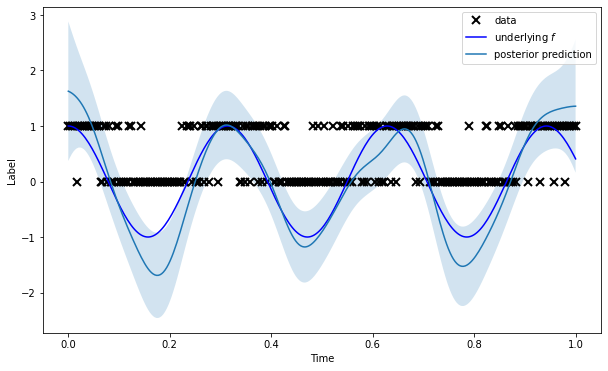

321 -171.60359634530835


321 -171.60357511158384


322 -171.6037014216432


322 -171.60366893724145


323 -171.60379285375478


323 -171.60378203921474


324 -171.6039074475664


324 -171.60388558627665


325 -171.60401222717138


325 -171.6039924242708


326 -171.6041192187097


326 -171.60409192489377


327 -171.60421686486623


327 -171.6041936468834


328 -171.604322219327


328 -171.6043048285529


329 -171.6044323082937


329 -171.60440653967913


330 -171.6045302391415


330 -171.60451129827024


331 -171.60463814760988


331 -171.60460731312315


332 -171.60473318478188


332 -171.60470443691787


333 -171.60483435245737


333 -171.60481187011737


334 -171.6049379981947


334 -171.60491980696625


335 -171.60504413932523


335 -171.6050184875662


336 -171.6051500984026


336 -171.6051284232405


337 -171.60525568561937


337 -171.60523237187834


338 -171.60536100354497


338 -171.60533835155775


339 -171.60546603596268


339 -171.6054420559065


340 -171.605569499893


340 -171.6055491522868


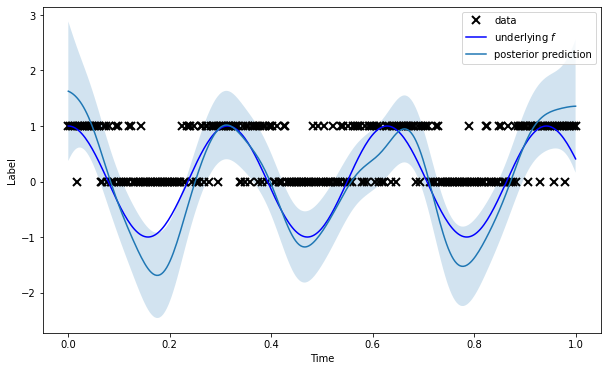

341 -171.60568205378107


341 -171.6056524885679


342 -171.60577934402545


342 -171.60576132222624


343 -171.6058921480913


343 -171.60587398355295


344 -171.60600288095407


344 -171.6059781225988


345 -171.60610697547799


345 -171.60609066012557


346 -171.60621899720783


346 -171.60619504430062


347 -171.6063285985796


347 -171.60630519696878


348 -171.60643394587166


348 -171.60641616788797


349 -171.6065488890775


349 -171.60651766034903


350 -171.60664704669907


350 -171.6066309349959


351 -171.60676106985994


351 -171.60672835818013


352 -171.60686337003133


352 -171.60684070296074


353 -171.6069687763747


353 -171.6069451227758


354 -171.60708081641894


354 -171.60706291261044


355 -171.60719274916676


355 -171.60716993375152


356 -171.60730358738883


356 -171.60726987488226


357 -171.60740277032923


357 -171.6073830954426


358 -171.60751633671856


358 -171.60749544627475


359 -171.60763097389537


359 -171.60760708693442


360 -171.60773868389379


360 -171.60772173040044


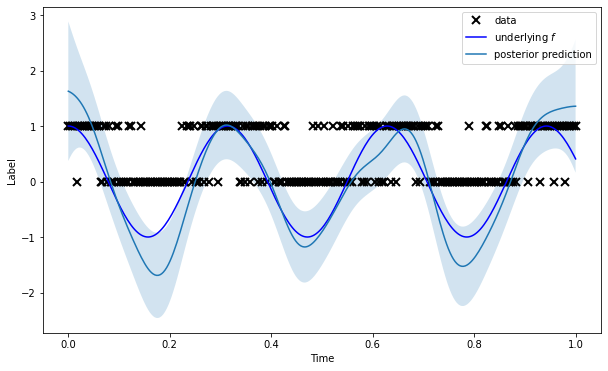

361 -171.607856990776


361 -171.60783670703825


362 -171.60796864283094


362 -171.60794724409476


363 -171.60808336378417


363 -171.60806206782883


364 -171.60819581356114


364 -171.60816510993965


365 -171.60829917192697


365 -171.60827457017288


366 -171.60841029451154


366 -171.60838999637312


367 -171.60852597391292


367 -171.6085053123811


368 -171.6086442327162


368 -171.60862077482608


369 -171.60875406664803


369 -171.6087219414064


370 -171.60885874930347


370 -171.60883066720822


371 -171.60896942043323


371 -171.60894278012944


372 -171.60907653761538


372 -171.6090499517945


373 -171.6091879786963


373 -171.60916963761218


374 -171.6093069319246


374 -171.60928163497593


375 -171.6094229122888


375 -171.60939893335137


376 -171.6095342309196


376 -171.60951943726795


377 -171.60966089371647


377 -171.60963311265735


378 -171.6097696081466


378 -171.60974563828535


379 -171.60988410995492


379 -171.6098609497622


380 -171.60999957160715


380 -171.60997282556414


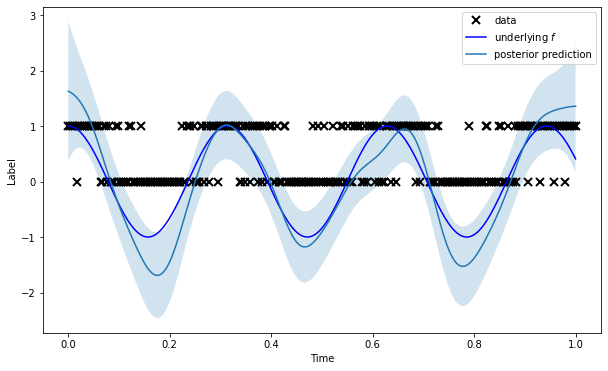

381 -171.6101118943829


381 -171.61008766988996


382 -171.6102294115604


382 -171.61020831724778


383 -171.6103479859624


383 -171.6103205628396


384 -171.61046213557654


384 -171.61043670930775


385 -171.61057481484156


385 -171.61055065403832


386 -171.61069114161882


386 -171.6106670705913


387 -171.6108077002816


387 -171.6107852209993


388 -171.61092870768366


388 -171.61091299517807


389 -171.61105360488153


389 -171.61102518093367


390 -171.61116552017967


390 -171.6111380291827


391 -171.61127873538004


391 -171.61124545256243


392 -171.61138721271445


392 -171.61136125003353


393 -171.61150356974207


393 -171.6114807292475


394 -171.61162438671408


394 -171.61159955264168


395 -171.61173970570704


395 -171.6117133747194


396 -171.61185739881904


396 -171.61183652010862


397 -171.61197855956715


397 -171.61195938412766


398 -171.6121000725612


398 -171.6120841180399


399 -171.61222882030086


399 -171.61220729133126


400 -171.61235143078846


400 -171.61233144584122


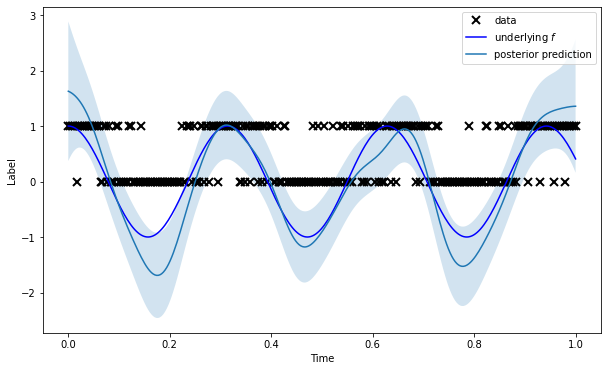

401 -171.6124744854003


401 -171.61245268110048


402 -171.61259770473413


402 -171.61256411894925


403 -171.6127069655206


403 -171.61268731092247


404 -171.61283182965659


404 -171.6127945187004


405 -171.61294024609975


405 -171.61291526927425


406 -171.61306259132203


406 -171.61304402006826


407 -171.6131886631504


407 -171.61316851508377


408 -171.61331258222265


408 -171.61328337865885


409 -171.61342764855664


409 -171.61340898579948


410 -171.61355466906804


410 -171.61352837252747


411 -171.6136737267458


411 -171.61364764884593


412 -171.61379470158175


412 -171.61376814413222


413 -171.6139162223282


413 -171.61388837736416


414 -171.61403101821787


414 -171.61401045358232


415 -171.6141589459399


415 -171.6141334233822


416 -171.61427885047783


416 -171.61424506199904


417 -171.61439140357732


417 -171.61436708557133


418 -171.61451530918288


418 -171.61449591662748


419 -171.6146439779496


419 -171.61462321626306


420 -171.61476897575668


420 -171.6147498834773


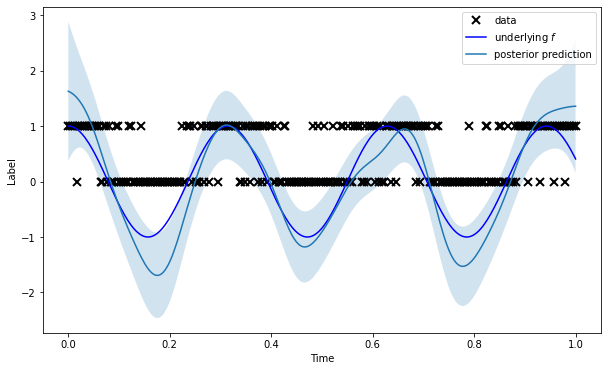

421 -171.61489765129195


421 -171.61487703070287


422 -171.61502488731497


422 -171.61500368286823


423 -171.61515027967752


423 -171.61512422462692


424 -171.6152711579185


424 -171.61524945605674


425 -171.61539905250106


425 -171.61536612020387


426 -171.61551253218744


426 -171.61549141728096


427 -171.61564016916824


427 -171.6156119746184


428 -171.61576143019008


428 -171.6157343182788


429 -171.6158823205909


429 -171.61585862178185


430 -171.6160097927068


430 -171.61598783994174


431 -171.61613554558676


431 -171.61610381020301


432 -171.61625553936815


432 -171.6162152851521


433 -171.61636251350305


433 -171.61633730808643


434 -171.6164903287512


434 -171.6164682346711


435 -171.6166168452037


435 -171.6165973029266


436 -171.61674830504722


436 -171.61671717359414


437 -171.61686588181638


437 -171.6168362344722


438 -171.61698768111106


438 -171.61696981674473


439 -171.61712282092725


439 -171.61710186101794


440 -171.6172501753639


440 -171.61722561998857


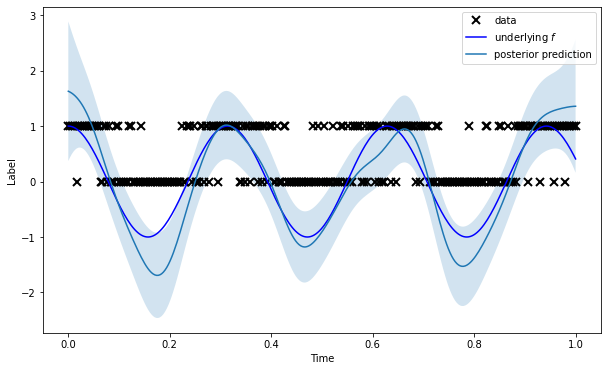

441 -171.61737510360462


441 -171.6173487987587


442 -171.6175011807175


442 -171.61747963300576


443 -171.61763105467327


443 -171.61760731693576


444 -171.61776125988592


444 -171.61773335508136


445 -171.61788382602728


445 -171.61785274301286


446 -171.61800482168064


446 -171.61798474058773


447 -171.61813904299092


447 -171.61811508352014


448 -171.61826352104902


448 -171.61823151739506


449 -171.61838427897024


449 -171.61835831603713


450 -171.61851212320886


450 -171.61848183752898


451 -171.61863239506977


451 -171.61860004026744


452 -171.6187546843799


452 -171.61872233050124


453 -171.61887694181112


453 -171.6188555111447


454 -171.6190063732594


454 -171.61898090036448


455 -171.61913409632064


455 -171.61911470032769


456 -171.61927118228814


456 -171.61924913986786


457 -171.61939850240844


457 -171.6193644764915


458 -171.61952093930216


458 -171.61949885689813


459 -171.6196531298478


459 -171.6196247323093


460 -171.61977572404317


460 -171.61975156336035


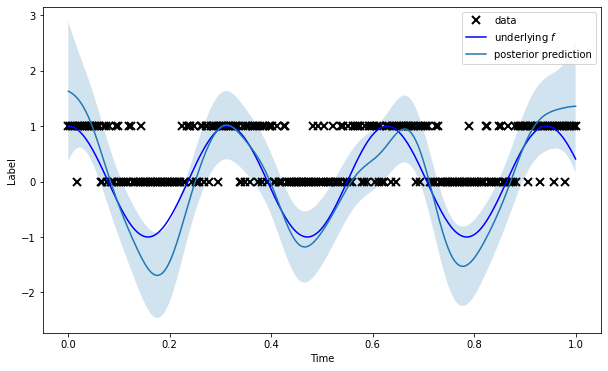

461 -171.61990743268566


461 -171.61988090914366


462 -171.62003445020048


462 -171.6200112105862


463 -171.62016622500755


463 -171.62014865930695


464 -171.62030370104407


464 -171.6202812742361


465 -171.62043421655738


465 -171.62041079831215


466 -171.62056673185205


466 -171.62054538072724


467 -171.62070064909108


467 -171.62067024754913


468 -171.62083096997878


468 -171.62081067180844


469 -171.6209657129275


469 -171.62093496372097


470 -171.62109043616562


470 -171.62106464603121


471 -171.62122288607355


471 -171.62120364538907


472 -171.62135996790298


472 -171.62134158861716


473 -171.62149987887338


473 -171.6214728306141


474 -171.62163273321266


474 -171.62160575368625


475 -171.62176384036917


475 -171.6217341381005


476 -171.62189358485963


476 -171.6218528009058


477 -171.6220139916274


477 -171.62199530863728


478 -171.62215628254754


478 -171.62213314924833


479 -171.62229323939704


479 -171.62225962880592


480 -171.62241757063276


480 -171.62238665909587


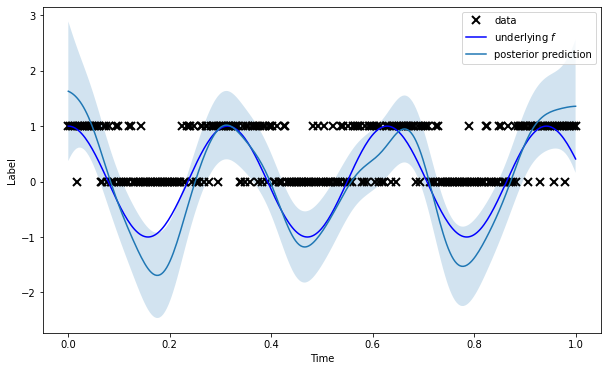

481 -171.62254715532637


481 -171.62251810450624


482 -171.6226773211249


482 -171.62264954054567


483 -171.62281140598208


483 -171.62278554724716


484 -171.6229468380128


484 -171.62291193157444


485 -171.62307122001928


485 -171.62305003937888


486 -171.62321155733343


486 -171.62318978078181


487 -171.6233490437657


487 -171.62332222417504


488 -171.6234830569437


488 -171.62345342277524


489 -171.62361156954472


489 -171.6235801266327


490 -171.62374173709205


490 -171.62371367251544


491 -171.62387196336857


491 -171.623832804051


492 -171.6239948445932


492 -171.62397708758633


493 -171.62413795847593


493 -171.62410896378125


494 -171.6242685916958


494 -171.62423562462246


495 -171.6243965236422


495 -171.62437992385526


496 -171.62454218784424


496 -171.6245208565443


497 -171.62468183814832


497 -171.62465701936435


498 -171.62481724872956


498 -171.6248013541915


499 -171.6249632159736


499 -171.62493863644713


In [4]:

# Create a likelihood object

likelihood = PEPScalarLikelihood(Bernoulli())

alpha = .9
input_data = (tf.constant(time_points), tf.constant(observations))
pep = PowerExpectationPropagation(input_data=input_data, kernel=kernel,
                                  likelihood=likelihood, learning_rate=.5,
                                  alpha=alpha)


def plot_model(model):

    f_mu, f_var = model.posterior.predict_f(time_points)
    f_mu = f_mu.numpy()
    f_std = np.sqrt(f_var)

    plt.figure(figsize=(10, 6))
    plt.plot(time_points, observations, 'kx', ms=8, mew=2, label='data')
    plt.plot(time_points, F, 'b', ms=8, mew=2, label='underlying $f$')
    plt.plot(time_points, f_mu, 'C0', ms=8, mew=2, label='posterior prediction')
    plt.fill_between(
        time_points,
        y1 = (f_mu - 2 * f_std).reshape(-1,),
        y2 = (f_mu + 2 * f_std).reshape(-1,),
        alpha=.2, facecolor='C0'
    )
    plt.xlabel("Time")
    plt.ylabel("Label")
    plt.legend()
    plt.show()


plot_model(pep)


import tensorflow as tf
opt = tf.optimizers.Adam(learning_rate=0.05)

def opt_step():
    opt.minimize(lambda :-pep.energy(), pep.kernel.trainable_variables)


batch_size = num_data // 5
max_iter = ci_niter(500)
for i in range(max_iter):
    indices = np.random.permutation(num_data)[:batch_size].reshape(-1,1)

    print(i, pep.energy().numpy())
    pep.update_sites(indices)
    print(i, pep.energy().numpy())
    opt_step()

    if i%20 ==0:
        plot_model(pep)